<a href="https://colab.research.google.com/github/varsha2176/Data_Science_Prodigy/blob/main/prodigy_DS_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the main data CSV
data_df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_900.csv', skiprows=4)

# Load the metadata CSV files
metadata_country_df = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_900.csv')
metadata_indicator_df = pd.read_csv('Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_900.csv')



In [4]:
# Display first few rows of the main dataset
data_df.head()

# Display first few rows of metadata files
metadata_country_df.head()
metadata_indicator_df.head()



,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,NaN


In [5]:
# Extract the population data for 2020
population_2020 = data_df[['Country Name', '2020']]

# Drop rows with missing data
population_2020 = population_2020.dropna()


<ipython-input-12-38e79d4bd452>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


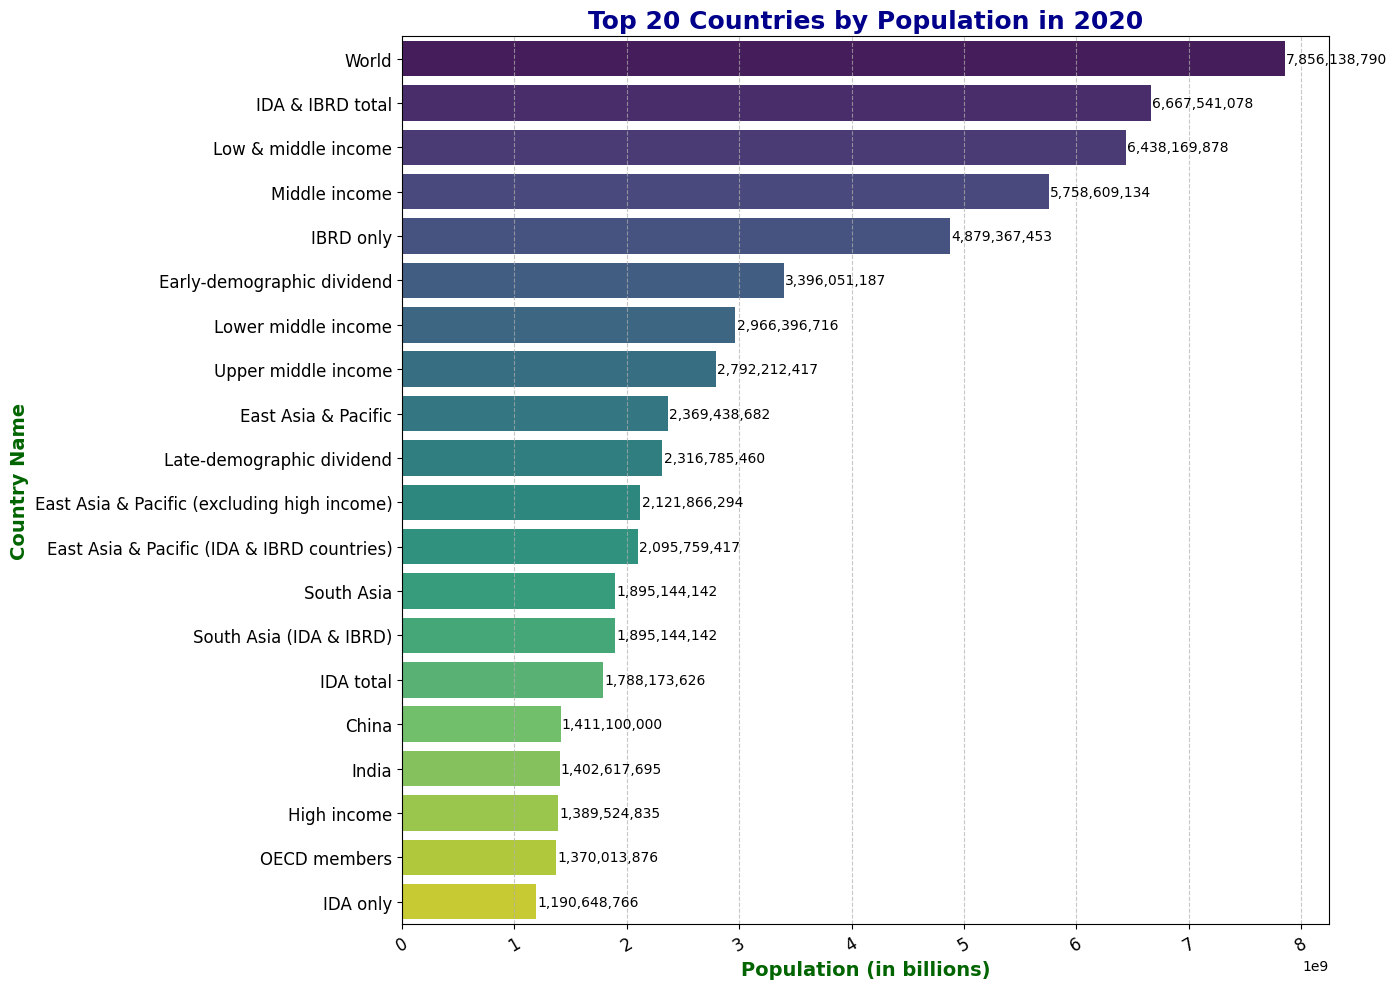

In [12]:
# Enhanced plotting of the distribution of the population for 2020
plt.figure(figsize=(14,10))

# Create the barplot with enhanced color palette and styling
sns.barplot(
    x='2020',
    y='Country Name',
    data=population_2020.sort_values('2020', ascending=False).head(20),
    palette='viridis'
)

# Add titles and labels with improved styling
plt.title('Top 20 Countries by Population in 2020', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Population (in billions)', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Country Name', fontsize=14, fontweight='bold', color='darkgreen')

# Customize the ticks for better readability
plt.xticks(fontsize=12, rotation=30, color='black')
plt.yticks(fontsize=12, color='black')

# Add gridlines for easier comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate bars with population values
for i, value in enumerate(population_2020.sort_values('2020', ascending=False).head(20)['2020']):
    plt.text(
        value + 1e7, i, f'{value:,.0f}',
        fontsize=10, va='center', color='black'
    )

# Display the plot
plt.tight_layout()
plt.show()


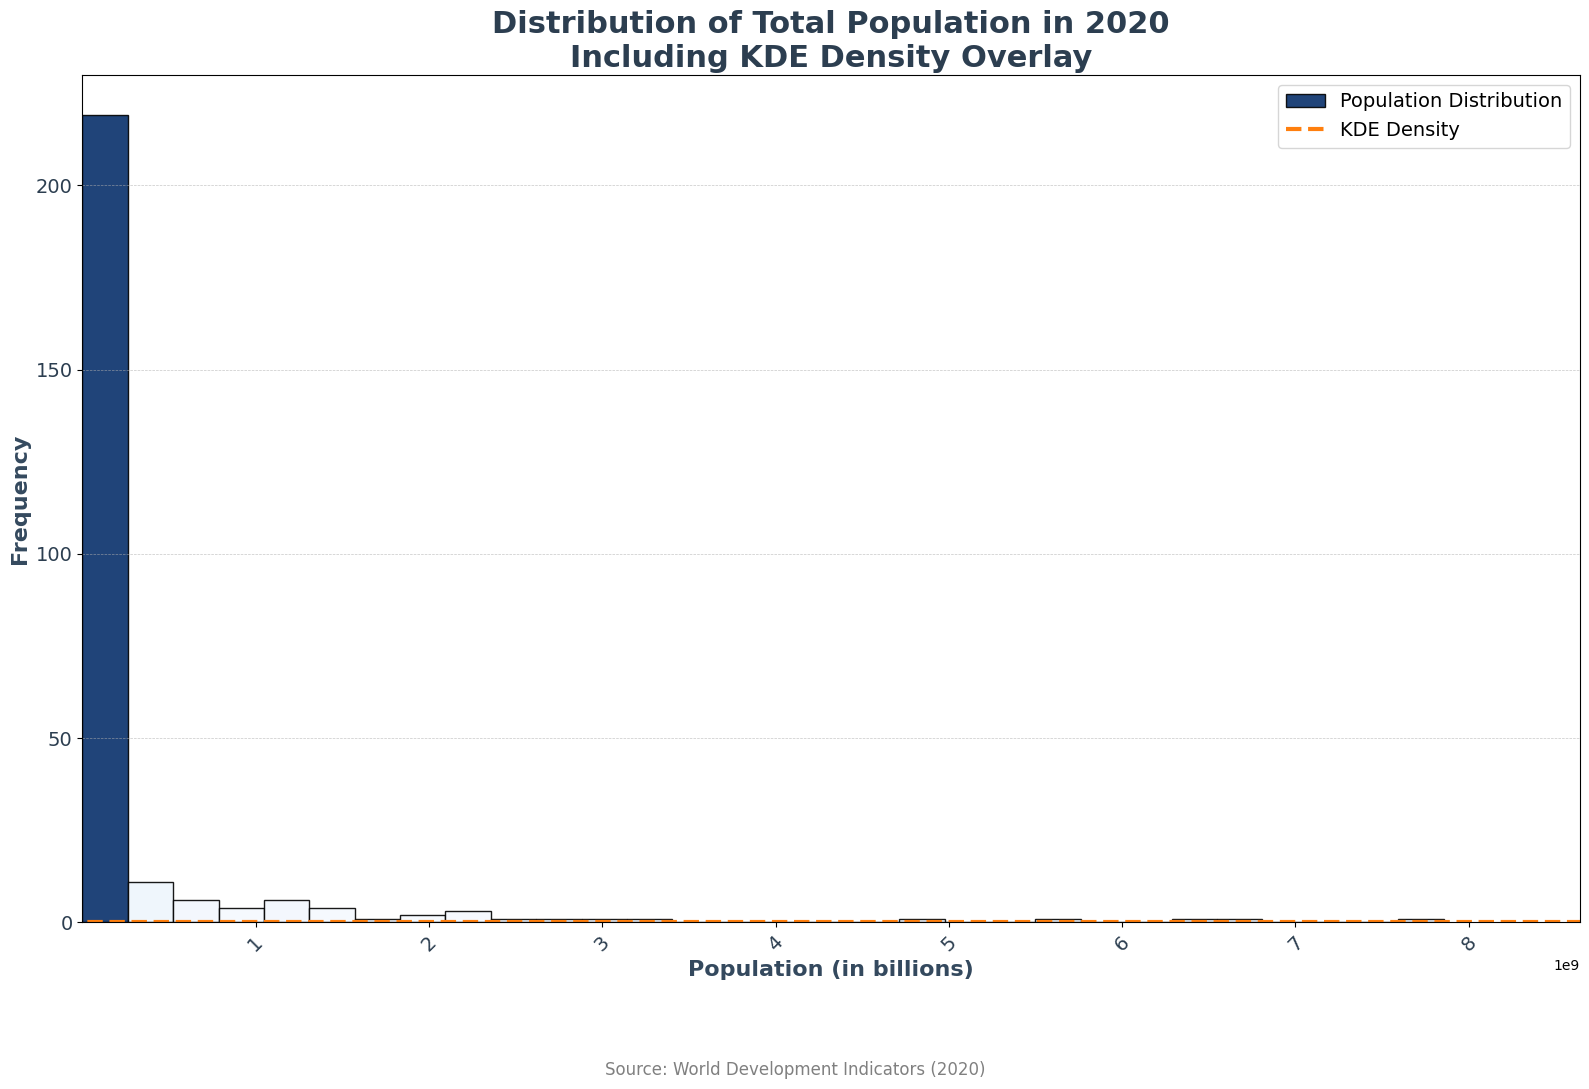

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

# Enhanced histogram for the population data in 2020 with gradient bars
plt.figure(figsize=(16, 10))

# Plot the histogram
n, bins, patches = plt.hist(
    population_2020['2020'],
    bins=30,
    edgecolor='black',
    alpha=0.9,
    label='Population Distribution'
)

# Apply a gradient color for each bar
cmap = plt.cm.Blues  # Use a blue gradient color map
normalize = mcolors.Normalize(vmin=min(n), vmax=max(n))  # Normalize based on frequencies

for bar, freq in zip(patches, n):
    bar.set_facecolor(cmap(normalize(freq)))  # Apply gradient color based on frequency

# Overlay a KDE plot for smoother density estimation
sns.kdeplot(
    population_2020['2020'],
    color='#ff7f0e',
    linewidth=3,
    linestyle='--',
    label='KDE Density'
)

# Adjust x-axis limits to give some space between the bars and the axis
plt.xlim(
    population_2020['2020'].min() - 0.1 * population_2020['2020'].min(),
    population_2020['2020'].max() + 0.1 * population_2020['2020'].max()
)

# Add a bold, descriptive title
plt.title(
    'Distribution of Total Population in 2020\nIncluding KDE Density Overlay',
    fontsize=22,
    fontweight='bold',
    color='#2c3e50'
)

# Add customized axis labels with emphasis
plt.xlabel('Population (in billions)', fontsize=16, fontweight='bold', color='#34495e')
plt.ylabel('Frequency', fontsize=16, fontweight='bold', color='#34495e')

# Improve tick labels for clarity
plt.xticks(fontsize=14, rotation=45, color='#2c3e50')
plt.yticks(fontsize=14, color='#2c3e50')

# Add subtle gridlines to enhance readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend for clarity
plt.legend(fontsize=14)

# Include a footer with source information
plt.figtext(
    0.5, -0.08,
    'Source: World Development Indicators (2020)',
    wrap=True,
    horizontalalignment='center',
    fontsize=12,
    color='gray'
)

# Optimize layout for aesthetics
plt.tight_layout()

# Display the plot
plt.show()
